In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from IPython.display import display
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
data = pd.read_csv("train.csv")
data.head()

,Unnamed: 0,ID,ncap rating,is power door locks,policyholder age,is parking camera,rear brakes type,is adjustable steering,is tpms,is driver seat height adjustable,...,is parking sensors,power,gross weight,is day night rear view mirror,model,gear box,airbags,turning radius,area danger level,is claim
0,0,0,2.0,Yes,0.394496,No,Drum,No,No,No,...,Yes,55.92bhp@5300rpm,1340.0,No,Model_8,5.0,2.0,4.7,4,0
1,1,1,2.0,Yes,0.417364,No,Drum,No,No,No,...,Yes,55.92bhp@5300rpm,1340.0,No,Model_8,5.0,2.0,4.7,1,1
2,2,2,2.0,Yes,0.438922,No,Drum,Yes,No,Yes,...,Yes,88.50bhp@6000rpm,1335.0,Yes,Model_6,5.0,2.0,4.8,5,0
3,3,3,0.0,No,0.656276,No,Drum,No,No,No,...,Yes,40.36bhp@6000rpm,1185.0,No,Model_1,5.0,2.0,4.6,2,0
4,4,4,3.0,Yes,0.462328,Yes,Disc,Yes,Yes,Yes,...,Yes,113.45bhp@4000rpm,1720.0,No,Model_4,6.0,6.0,5.2,3,0


In [3]:
data.drop(columns=["Unnamed: 0","ID"],axis=1,inplace=True)
data.head()

,ncap rating,is power door locks,policyholder age,is parking camera,rear brakes type,is adjustable steering,is tpms,is driver seat height adjustable,segment,car age,...,is parking sensors,power,gross weight,is day night rear view mirror,model,gear box,airbags,turning radius,area danger level,is claim
0,2.0,Yes,0.394496,No,Drum,No,No,No,B1,0.08,...,Yes,55.92bhp@5300rpm,1340.0,No,Model_8,5.0,2.0,4.7,4,0
1,2.0,Yes,0.417364,No,Drum,No,No,No,B1,0.06,...,Yes,55.92bhp@5300rpm,1340.0,No,Model_8,5.0,2.0,4.7,1,1
2,2.0,Yes,0.438922,No,Drum,Yes,No,Yes,B2,0.03,...,Yes,88.50bhp@6000rpm,1335.0,Yes,Model_6,5.0,2.0,4.8,5,0
3,0.0,No,0.656276,No,Drum,No,No,No,A,0.04,...,Yes,40.36bhp@6000rpm,1185.0,No,Model_1,5.0,2.0,4.6,2,0
4,3.0,Yes,0.462328,Yes,Disc,Yes,Yes,Yes,C2,0.04,...,Yes,113.45bhp@4000rpm,1720.0,No,Model_4,6.0,6.0,5.2,3,0


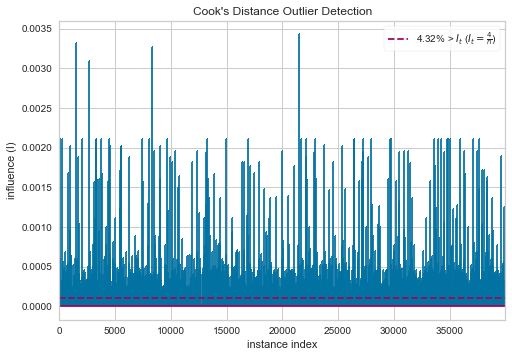

<AxesSubplot:title={'center':"Cook's Distance Outlier Detection"}, xlabel='instance index', ylabel='influence (I)'>

In [13]:
from yellowbrick.regressor import CooksDistance
cookdf = data.dropna()
X = cookdf[["car age","population"]]
y = cookdf["is claim"]
visualizer = CooksDistance()
visualizer.fit(X, y)
visualizer.show()

In [12]:
pd.set_option('display.max_columns', 50)
data[data["ncap rating"].isnull()]

,ncap rating,is power door locks,policyholder age,is parking camera,rear brakes type,is adjustable steering,is tpms,is driver seat height adjustable,segment,car age,is central locking,is rear window wiper,height,cluster area,is ecw,fuel type,torque,engine volume,transmission type,manufacturer,cylinder,is rear window washer,is front fog lights,is brake assist,is power steering,is esc,population,is rear window defogger,time period,engine type,is speed alert,steering type,length,width,is parking sensors,power,gross weight,is day night rear view mirror,model,gear box,airbags,turning radius,area danger level,is claim
126,NaN,No,0.747300,No,Drum,No,No,No,A,0.04,No,No,1475.0,Area_9,No,CNG,60Nm@3500rpm,796.0,Manual,1.0,3.0,No,No,No,Yes,No,17879.0,No,0.527331,F8D Petrol Engine,Yes,Power,3445.0,1515.0,Yes,40.36bhp@6000rpm,1185.0,No,Model_1,5.0,2.0,4.6,2,0
731,NaN,No,0.612324,No,Drum,No,No,No,A,0.01,No,No,1475.0,Area_8,No,CNG,60Nm@3500rpm,796.0,Manual,1.0,3.0,No,No,No,Yes,No,8828.0,No,1.133107,F8D Petrol Engine,Yes,Power,3445.0,1515.0,Yes,40.36bhp@6000rpm,1185.0,No,Model_1,5.0,2.0,4.6,1,0
1316,NaN,Yes,0.502840,No,Drum,No,No,No,B1,0.04,Yes,No,1675.0,Area_4,Yes,CNG,82.1Nm@3400rpm,998.0,Manual,1.0,3.0,No,No,No,Yes,No,21640.0,No,1.170905,K10C,Yes,Power,3655.0,1620.0,Yes,55.92bhp@5300rpm,1340.0,No,Model_8,5.0,2.0,4.7,5,0
1622,NaN,Yes,0.835844,No,Drum,Yes,No,Yes,B2,0.09,Yes,No,1530.0,Area_14,Yes,Petrol,113Nm@4400rpm,1197.0,Manual,1.0,4.0,No,Yes,Yes,Yes,No,7829.0,No,0.844531,K Series Dual jet,Yes,Electric,3845.0,1735.0,Yes,88.50bhp@6000rpm,1335.0,Yes,Model_6,5.0,2.0,4.8,3,0
1969,NaN,Yes,0.476501,No,Drum,Yes,No,No,B2,0.02,Yes,No,1523.0,Area_14,Yes,Diesel,200Nm@3000rpm,1497.0,Manual,4.0,4.0,No,No,No,Yes,No,7819.0,No,1.302173,1.5 Turbocharged Revotorq,Yes,Electric,3990.0,1755.0,Yes,88.77bhp@4000rpm,1490.0,No,Model_5,5.0,2.0,5.0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42624,NaN,Yes,0.635216,Yes,Disc,Yes,Yes,Yes,C2,0.04,Yes,Yes,1635.0,Area_13,Yes,Diesel,250Nm@2750rpm,1493.0,Automatic,3.0,4.0,Yes,Yes,Yes,Yes,Yes,5421.0,Yes,0.471655,1.5 L U2 CRDi,Yes,Power,4300.0,1790.0,Yes,113.45bhp@4000rpm,1720.0,No,Model_4,6.0,6.0,5.2,5,0
42788,NaN,Yes,0.539888,No,Drum,Yes,No,No,B2,0.18,Yes,No,1523.0,Area_5,Yes,Diesel,200Nm@3000rpm,1497.0,Manual,4.0,4.0,No,No,No,Yes,No,34796.0,No,0.557700,1.5 Turbocharged Revotorq,Yes,Electric,3990.0,1755.0,Yes,88.77bhp@4000rpm,1490.0,No,Model_5,5.0,2.0,5.0,5,0
42879,NaN,Yes,0.508172,Yes,Drum,No,No,No,A,0.07,Yes,No,1490.0,Area_2,Yes,Petrol,91Nm@4250rpm,999.0,Automatic,2.0,3.0,No,No,No,Yes,No,27032.0,No,1.154294,1.0 SCe,Yes,Electric,3731.0,1579.0,No,67.06bhp@5500rpm,1155.0,Yes,Model_3,5.0,2.0,5.0,3,0
42955,NaN,No,0.622246,No,Drum,No,No,No,A,0.01,No,No,1475.0,Area_2,No,CNG,60Nm@3500rpm,796.0,Manual,1.0,3.0,No,No,No,Yes,No,27079.0,No,0.837517,F8D Petrol Engine,Yes,Power,3445.0,1515.0,Yes,40.36bhp@6000rpm,1185.0,No,Model_1,5.0,2.0,4.6,2,0


In [20]:
data[data["cylinder"].isnull()] #!!!

,ncap rating,is power door locks,policyholder age,is parking camera,rear brakes type,is adjustable steering,is tpms,is driver seat height adjustable,segment,car age,is central locking,is rear window wiper,height,cluster area,is ecw,fuel type,torque,engine volume,transmission type,manufacturer,cylinder,is rear window washer,is front fog lights,is brake assist,is power steering,is esc,population,is rear window defogger,time period,engine type,is speed alert,steering type,length,width,is parking sensors,power,gross weight,is day night rear view mirror,model,gear box,airbags,turning radius,area danger level,is claim
1093,3.0,Yes,0.676324,Yes,Disc,Yes,Yes,Yes,C2,0.05,Yes,Yes,1635.0,Area_8,Yes,Diesel,250Nm@2750rpm,1493.0,Automatic,3.0,NaN,Yes,Yes,Yes,Yes,Yes,8877.0,Yes,0.321679,1.5 L U2 CRDi,Yes,Power,4300.0,1790.0,Yes,113.45bhp@4000rpm,1720.0,No,Model_4,6.0,6.0,5.2,4,0
1364,0.0,No,0.535050,No,Drum,No,No,No,A,0.02,No,No,1475.0,Area_17,No,CNG,60Nm@3500rpm,796.0,Manual,1.0,NaN,No,No,No,Yes,No,65583.0,No,0.894434,F8D Petrol Engine,Yes,Power,3445.0,1515.0,Yes,40.36bhp@6000rpm,1185.0,No,Model_1,5.0,2.0,4.6,1,0
1545,0.0,No,0.434881,No,Drum,No,No,No,A,0.03,No,No,1475.0,Area_5,No,CNG,60Nm@3500rpm,796.0,Manual,1.0,NaN,No,No,No,Yes,No,34740.0,No,0.141864,F8D Petrol Engine,Yes,Power,3445.0,1515.0,Yes,40.36bhp@6000rpm,1185.0,No,Model_1,5.0,2.0,4.6,1,0
2198,0.0,No,0.657598,No,Drum,No,No,No,A,0.00,No,No,1475.0,Area_1,No,CNG,60Nm@3500rpm,796.0,Manual,1.0,NaN,No,No,No,Yes,No,5066.0,No,0.160703,F8D Petrol Engine,Yes,Power,3445.0,1515.0,Yes,40.36bhp@6000rpm,1185.0,No,Model_1,5.0,2.0,4.6,4,0
2850,3.0,Yes,0.600176,Yes,Disc,Yes,Yes,Yes,C2,0.08,Yes,Yes,1635.0,Area_8,Yes,Diesel,250Nm@2750rpm,1493.0,Automatic,3.0,NaN,Yes,Yes,Yes,Yes,Yes,8829.0,Yes,1.272740,1.5 L U2 CRDi,Yes,Power,4300.0,1790.0,Yes,113.45bhp@4000rpm,1720.0,No,Model_4,6.0,6.0,5.2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40785,0.0,No,0.521561,No,Drum,No,No,No,A,0.01,No,No,1475.0,Area_16,No,CNG,60Nm@3500rpm,796.0,Manual,1.0,NaN,No,No,No,Yes,No,16253.0,No,0.484003,F8D Petrol Engine,Yes,Power,3445.0,1515.0,Yes,40.36bhp@6000rpm,1185.0,No,Model_1,5.0,2.0,4.6,5,0
41945,2.0,Yes,0.539957,No,Drum,Yes,No,Yes,B2,0.10,Yes,No,1530.0,Area_15,Yes,Petrol,113Nm@4400rpm,1197.0,Manual,1.0,NaN,No,Yes,Yes,Yes,No,296.0,No,0.377846,K Series Dual jet,Yes,Electric,3845.0,1735.0,Yes,88.50bhp@6000rpm,1335.0,Yes,Model_6,5.0,2.0,4.8,2,0
41986,3.0,Yes,0.683054,Yes,Disc,Yes,Yes,Yes,C2,0.00,Yes,Yes,1635.0,Area_1,Yes,Diesel,250Nm@2750rpm,1493.0,Automatic,3.0,NaN,Yes,Yes,Yes,Yes,Yes,5069.0,Yes,0.404625,1.5 L U2 CRDi,Yes,Power,4300.0,1790.0,Yes,113.45bhp@4000rpm,1720.0,No,Model_4,6.0,6.0,5.2,5,0
42674,3.0,Yes,0.560331,Yes,Disc,Yes,Yes,Yes,C2,0.04,Yes,Yes,1635.0,Area_7,Yes,Diesel,250Nm@2750rpm,1493.0,Automatic,3.0,NaN,Yes,Yes,Yes,Yes,Yes,6128.0,Yes,1.004798,1.5 L U2 CRDi,Yes,Power,4300.0,1790.0,Yes,113.45bhp@4000rpm,1720.0,No,Model_4,6.0,6.0,5.2,1,1


In [21]:
data[data["population"].isnull()] 

,ncap rating,is power door locks,policyholder age,is parking camera,rear brakes type,is adjustable steering,is tpms,is driver seat height adjustable,segment,car age,is central locking,is rear window wiper,height,cluster area,is ecw,fuel type,torque,engine volume,transmission type,manufacturer,cylinder,is rear window washer,is front fog lights,is brake assist,is power steering,is esc,population,is rear window defogger,time period,engine type,is speed alert,steering type,length,width,is parking sensors,power,gross weight,is day night rear view mirror,model,gear box,airbags,turning radius,area danger level,is claim
178,0.0,No,0.566488,No,Drum,No,No,No,A,0.01,No,No,1475.0,Area_3,No,CNG,60Nm@3500rpm,796.0,Manual,1.0,3.0,No,No,No,Yes,No,NaN,No,0.507912,F8D Petrol Engine,Yes,Power,3445.0,1515.0,Yes,40.36bhp@6000rpm,1185.0,No,Model_1,5.0,2.0,4.60,1,0
1168,2.0,Yes,0.688438,No,Drum,Yes,No,Yes,B2,0.03,Yes,No,1530.0,Area_13,Yes,Petrol,113Nm@4400rpm,1197.0,Manual,1.0,4.0,No,Yes,Yes,Yes,No,NaN,No,0.183897,K Series Dual jet,Yes,Electric,3845.0,1735.0,Yes,88.50bhp@6000rpm,1335.0,Yes,Model_6,5.0,2.0,4.80,1,0
1307,2.0,Yes,0.513447,Yes,Drum,No,No,No,A,0.10,Yes,No,1490.0,Area_14,Yes,Petrol,91Nm@4250rpm,999.0,Automatic,2.0,3.0,No,No,No,Yes,No,NaN,No,1.196191,1.0 SCe,Yes,Electric,3731.0,1579.0,No,67.06bhp@5500rpm,1155.0,Yes,Model_3,5.0,2.0,5.00,3,0
1600,3.0,Yes,0.582514,Yes,Disc,Yes,Yes,Yes,C2,0.15,Yes,Yes,1635.0,Area_13,Yes,Diesel,250Nm@2750rpm,1493.0,Automatic,3.0,4.0,Yes,Yes,Yes,Yes,Yes,NaN,Yes,1.200547,1.5 L U2 CRDi,Yes,Power,4300.0,1790.0,Yes,113.45bhp@4000rpm,1720.0,No,Model_4,6.0,6.0,5.20,1,0
1764,2.0,Yes,0.492045,No,Drum,No,No,No,B1,0.01,Yes,No,1675.0,Area_3,Yes,CNG,82.1Nm@3400rpm,998.0,Manual,1.0,3.0,No,No,No,Yes,No,NaN,No,0.187281,K10C,Yes,Power,3655.0,1620.0,Yes,55.92bhp@5300rpm,1340.0,No,Model_8,5.0,2.0,4.70,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42520,0.0,No,0.462878,No,Drum,No,No,No,A,0.04,No,No,1475.0,Area_12,No,CNG,60Nm@3500rpm,796.0,Manual,1.0,3.0,No,No,No,Yes,No,NaN,No,0.282219,F8D Petrol Engine,Yes,Power,3445.0,1515.0,Yes,40.36bhp@6000rpm,1185.0,No,Model_1,5.0,2.0,4.60,5,0
42567,5.0,Yes,0.604775,Yes,Drum,No,No,Yes,C1,0.24,Yes,No,1606.0,Area_12,Yes,Petrol,170Nm@4000rpm,1199.0,Manual,4.0,3.0,No,No,Yes,Yes,Yes,NaN,Yes,1.194952,1.5 Turbocharged Revotron,No,Power,3993.0,1811.0,Yes,118.36bhp@5500rpm,1660.0,No,Model_11,6.0,2.0,5.10,5,0
42736,5.0,Yes,0.643740,No,Drum,Yes,No,No,B2,0.00,Yes,No,1523.0,Area_2,Yes,Diesel,200Nm@3000rpm,1497.0,Manual,4.0,4.0,No,No,No,Yes,No,NaN,No,0.143585,1.5 Turbocharged Revotorq,Yes,Electric,3990.0,1755.0,Yes,88.77bhp@4000rpm,1490.0,No,Model_5,5.0,2.0,5.00,5,0
42944,0.0,Yes,0.592661,Yes,Drum,Yes,No,Yes,B2,0.04,Yes,Yes,1500.0,Area_11,Yes,Petrol,113Nm@4400rpm,1197.0,Automatic,1.0,4.0,Yes,Yes,Yes,Yes,Yes,NaN,Yes,0.266310,1.2 L K Series Engine,Yes,Electric,3990.0,1745.0,Yes,88.50bhp@6000rpm,1410.0,Yes,Model_7,5.0,6.0,4.85,1,0


In [24]:
data[data["model"]=="Model_1"]

,ncap rating,is power door locks,policyholder age,is parking camera,rear brakes type,is adjustable steering,is tpms,is driver seat height adjustable,segment,car age,is central locking,is rear window wiper,height,cluster area,is ecw,fuel type,torque,engine volume,transmission type,manufacturer,cylinder,is rear window washer,is front fog lights,is brake assist,is power steering,is esc,population,is rear window defogger,time period,engine type,is speed alert,steering type,length,width,is parking sensors,power,gross weight,is day night rear view mirror,model,gear box,airbags,turning radius,area danger level,is claim
3,0.0,No,0.656276,No,Drum,No,No,No,A,0.04,No,No,1475.0,Area_13,No,CNG,60Nm@3500rpm,796.0,Manual,1.0,3.0,No,No,No,Yes,No,5482.0,No,0.746151,F8D Petrol Engine,Yes,Power,3445.0,1515.0,Yes,40.36bhp@6000rpm,1185.0,No,Model_1,5.0,2.0,4.6,2,0
5,0.0,No,0.593278,No,Drum,No,No,No,A,0.03,No,No,1475.0,Area_3,No,CNG,60Nm@3500rpm,796.0,Manual,1.0,3.0,No,No,No,Yes,No,4087.0,No,0.414677,F8D Petrol Engine,Yes,Power,3445.0,1515.0,Yes,40.36bhp@6000rpm,1185.0,No,Model_1,5.0,2.0,4.6,5,0
7,0.0,No,0.549770,No,Drum,No,No,No,A,0.02,No,No,1475.0,Area_3,No,CNG,60Nm@3500rpm,796.0,Manual,1.0,3.0,No,No,No,Yes,No,4138.0,No,0.236393,F8D Petrol Engine,Yes,Power,3445.0,1515.0,Yes,40.36bhp@6000rpm,1185.0,No,Model_1,5.0,2.0,4.6,1,0
8,0.0,No,0.403229,No,Drum,No,No,No,A,0.03,No,No,1475.0,Area_2,No,CNG,60Nm@3500rpm,796.0,Manual,1.0,3.0,No,No,No,Yes,No,27030.0,No,1.250164,F8D Petrol Engine,Yes,Power,3445.0,1515.0,Yes,40.36bhp@6000rpm,1185.0,No,Model_1,5.0,2.0,4.6,1,0
15,0.0,No,0.428673,No,Drum,No,No,No,A,0.06,No,No,1475.0,Area_1,No,CNG,60Nm@3500rpm,796.0,Manual,1.0,3.0,No,No,No,Yes,No,5001.0,No,0.234234,F8D Petrol Engine,Yes,Power,3445.0,1515.0,Yes,40.36bhp@6000rpm,1185.0,No,Model_1,5.0,2.0,4.6,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43571,0.0,No,0.593165,No,Drum,No,No,No,A,0.03,No,No,1475.0,Area_11,No,CNG,60Nm@3500rpm,796.0,Manual,1.0,3.0,No,No,No,Yes,No,6184.0,No,0.397057,F8D Petrol Engine,Yes,Power,3445.0,1515.0,Yes,40.36bhp@6000rpm,1185.0,No,Model_1,5.0,2.0,4.6,3,0
43576,0.0,No,0.628485,No,Drum,No,No,No,A,0.00,No,No,1475.0,Area_2,No,CNG,60Nm@3500rpm,796.0,Manual,1.0,3.0,No,No,No,Yes,No,27054.0,No,0.163303,F8D Petrol Engine,Yes,Power,3445.0,1515.0,Yes,40.36bhp@6000rpm,1185.0,No,Model_1,5.0,2.0,4.6,5,0
43583,0.0,No,0.465426,No,Drum,No,No,No,A,0.01,No,No,1475.0,Area_1,No,CNG,60Nm@3500rpm,796.0,Manual,1.0,3.0,No,No,No,Yes,No,5025.0,No,0.856750,F8D Petrol Engine,Yes,Power,3445.0,1515.0,Yes,40.36bhp@6000rpm,1185.0,No,Model_1,5.0,2.0,4.6,2,0
43585,0.0,No,0.405692,No,Drum,NaN,No,No,A,0.01,No,No,1475.0,Area_4,No,CNG,60Nm@3500rpm,796.0,Manual,1.0,3.0,No,No,No,Yes,No,21666.0,No,0.150154,F8D Petrol Engine,Yes,Power,3445.0,1515.0,Yes,40.36bhp@6000rpm,1185.0,No,Model_1,5.0,2.0,4.6,1,0


In [25]:
for i,j in data[data["model"]=="Model_1"].iteritems():
    print(j.value_counts())

0.0    10940
Name: ncap rating, dtype: int64
No    10933
Name: is power door locks, dtype: int64
0.656276    1
0.460129    1
0.636180    1
0.540676    1
0.759822    1
           ..
0.582486    1
0.493363    1
0.430635    1
0.680660    1
0.630818    1
Name: policyholder age, Length: 10950, dtype: int64
No    10941
Name: is parking camera, dtype: int64
Drum    10943
Name: rear brakes type, dtype: int64
No    10940
Name: is adjustable steering, dtype: int64
No    10943
Name: is tpms, dtype: int64
No    10943
Name: is driver seat height adjustable, dtype: int64
A    10943
Name: segment, dtype: int64
0.01    2762
0.00    2449
0.02    1864
0.03    1265
0.04     824
0.05     521
0.06     321
0.10     202
0.07     167
0.09     119
0.08     114
0.15      81
0.12      46
0.13      44
0.11      41
0.14      36
0.16      31
0.17      15
0.18      11
0.19       9
0.20       6
0.21       2
0.29       1
0.49       1
0.22       1
Name: car age, dtype: int64
No    10945
Name: is central locking, dtype:

In [26]:
data[data["cluster area"]=="Area_1"]

,ncap rating,is power door locks,policyholder age,is parking camera,rear brakes type,is adjustable steering,is tpms,is driver seat height adjustable,segment,car age,is central locking,is rear window wiper,height,cluster area,is ecw,fuel type,torque,engine volume,transmission type,manufacturer,cylinder,is rear window washer,is front fog lights,is brake assist,is power steering,is esc,population,is rear window defogger,time period,engine type,is speed alert,steering type,length,width,is parking sensors,power,gross weight,is day night rear view mirror,model,gear box,airbags,turning radius,area danger level,is claim
15,0.0,No,0.428673,No,Drum,No,No,No,A,0.06,No,No,1475.0,Area_1,No,CNG,60Nm@3500rpm,796.0,Manual,1.0,3.0,No,No,No,Yes,No,5001.0,No,0.234234,F8D Petrol Engine,Yes,Power,3445.0,1515.0,Yes,40.36bhp@6000rpm,1185.0,No,Model_1,5.0,2.0,4.60,3,0
27,0.0,Yes,0.459385,Yes,Drum,Yes,No,Yes,B2,0.11,Yes,Yes,1500.0,Area_1,Yes,Petrol,113Nm@4400rpm,1197.0,Automatic,1.0,4.0,Yes,Yes,Yes,Yes,Yes,5008.0,Yes,0.200179,1.2 L K Series Engine,Yes,Electric,3990.0,1745.0,Yes,88.50bhp@6000rpm,1410.0,Yes,Model_7,5.0,6.0,4.85,1,0
43,2.0,Yes,0.400332,No,Drum,Yes,No,Yes,B2,0.10,Yes,No,1530.0,Area_1,Yes,Petrol,113Nm@4400rpm,1197.0,Manual,1.0,4.0,No,Yes,Yes,Yes,No,5048.0,No,0.194369,K Series Dual jet,Yes,Electric,3845.0,1735.0,Yes,88.50bhp@6000rpm,1335.0,Yes,Model_6,5.0,2.0,4.80,1,0
146,3.0,Yes,0.503628,Yes,Disc,Yes,Yes,Yes,C2,0.08,Yes,Yes,1635.0,Area_1,Yes,Diesel,250Nm@2750rpm,1493.0,Automatic,3.0,4.0,Yes,Yes,Yes,Yes,Yes,5058.0,Yes,1.246028,1.5 L U2 CRDi,Yes,Power,4300.0,1790.0,Yes,113.45bhp@4000rpm,1720.0,No,Model_4,6.0,6.0,5.20,1,0
157,3.0,Yes,0.403607,Yes,Disc,Yes,Yes,Yes,C2,0.02,Yes,Yes,1635.0,Area_1,Yes,Diesel,250Nm@2750rpm,1493.0,Automatic,3.0,4.0,Yes,Yes,Yes,Yes,Yes,5058.0,Yes,0.303459,1.5 L U2 CRDi,Yes,Power,4300.0,1790.0,Yes,113.45bhp@4000rpm,1720.0,No,Model_4,6.0,6.0,5.20,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43415,2.0,Yes,0.424959,No,Drum,No,No,No,B1,0.09,Yes,No,1675.0,Area_1,Yes,CNG,82.1Nm@3400rpm,998.0,Manual,1.0,3.0,No,No,No,Yes,No,5001.0,No,0.161822,K10C,Yes,Power,3655.0,1620.0,Yes,55.92bhp@5300rpm,1340.0,No,Model_8,5.0,2.0,4.70,4,0
43421,2.0,Yes,0.534547,No,Drum,No,No,No,B1,0.05,Yes,No,1675.0,Area_1,Yes,CNG,82.1Nm@3400rpm,998.0,Manual,1.0,3.0,No,No,No,Yes,No,5088.0,No,0.288079,K10C,Yes,Power,3655.0,1620.0,Yes,55.92bhp@5300rpm,1340.0,No,Model_8,5.0,2.0,4.70,1,0
43513,3.0,Yes,0.448292,Yes,Disc,Yes,Yes,Yes,C2,0.08,Yes,Yes,1635.0,Area_1,Yes,Diesel,250Nm@2750rpm,1493.0,Automatic,3.0,4.0,Yes,Yes,Yes,Yes,Yes,5080.0,Yes,0.375964,1.5 L U2 CRDi,Yes,Power,4300.0,1790.0,Yes,113.45bhp@4000rpm,1720.0,No,Model_4,6.0,6.0,5.20,2,0
43526,0.0,No,0.473668,No,Drum,No,No,No,A,0.04,No,No,1475.0,Area_1,No,CNG,60Nm@3500rpm,796.0,Manual,1.0,3.0,No,No,No,Yes,NaN,5019.0,No,0.448710,F8D Petrol Engine,Yes,Power,3445.0,1515.0,Yes,40.36bhp@6000rpm,1185.0,No,Model_1,5.0,2.0,4.60,5,0


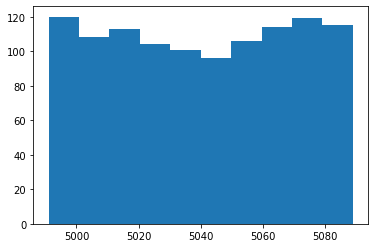

In [29]:
plt.hist(data[data["cluster area"]=="Area_1"]["population"]);

In [1]:
##### After logical fill:

In [31]:
data.dropna(inplace=True)

In [32]:
df = data.copy()

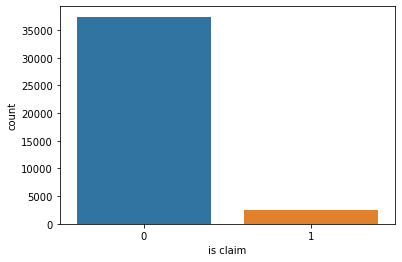

In [33]:
sns.countplot(df['is claim'],label="Count");

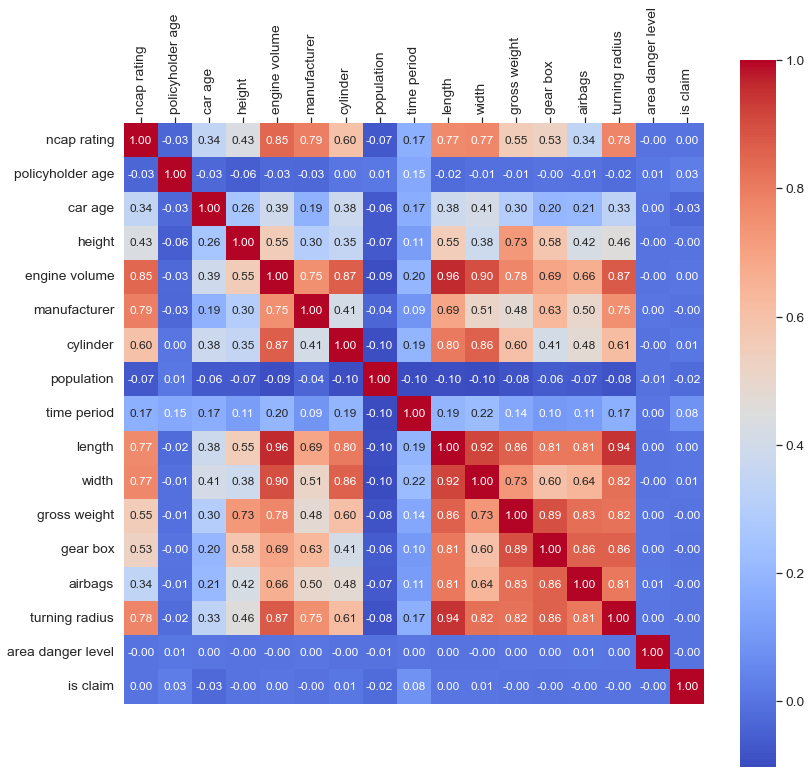

In [34]:
sns.set(font_scale = 1.25)
correlation_matrix = df.corr()
plt.figure(figsize=(13,13))
ax = sns.heatmap(correlation_matrix, vmax=1, cbar=True, square=True, annot=True, fmt='.2f', 
                 annot_kws={'size': 12}, cmap='coolwarm')
ax.xaxis.set_ticks_position('top')
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

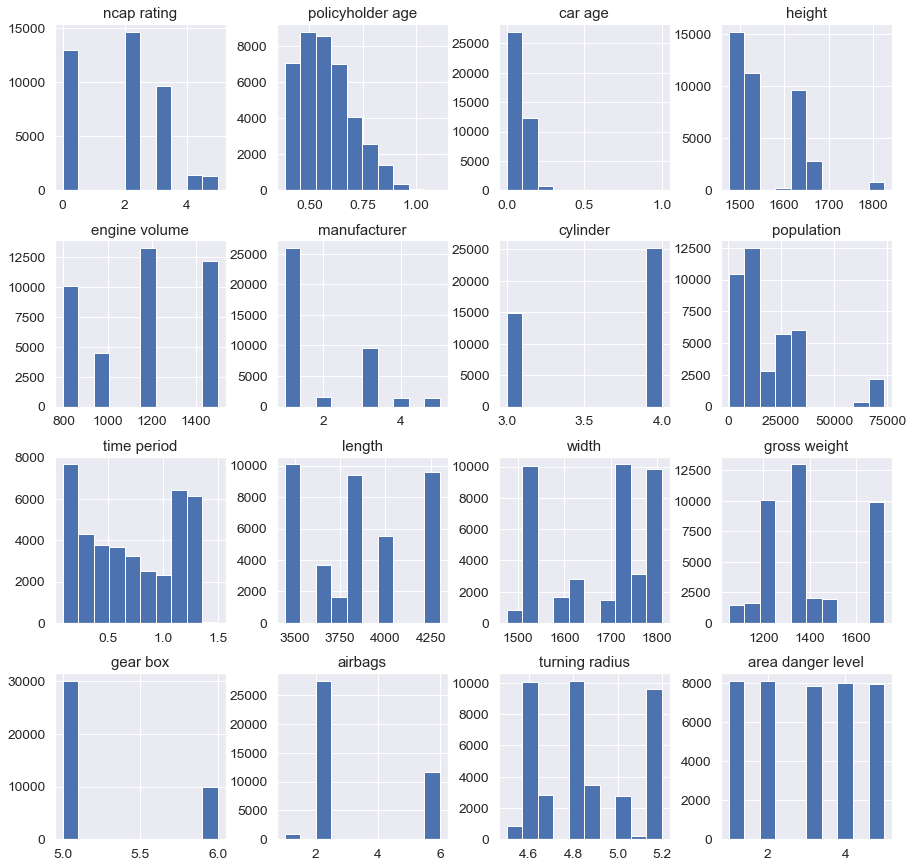

In [37]:
df.drop("is claim",axis=1).hist(figsize = [15,15]);

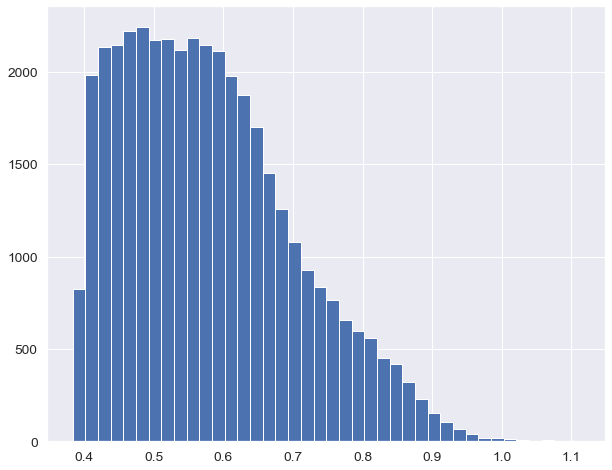

In [40]:
df["policyholder age"].hist(figsize = [10,8],bins=40);

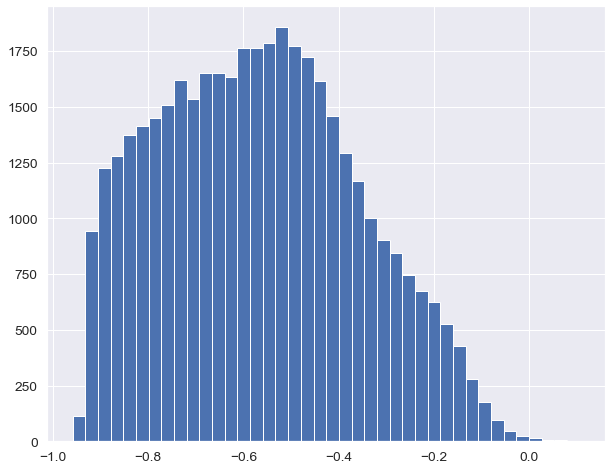

In [41]:
np.log(df["policyholder age"]).hist(figsize = [10,8],bins=40);

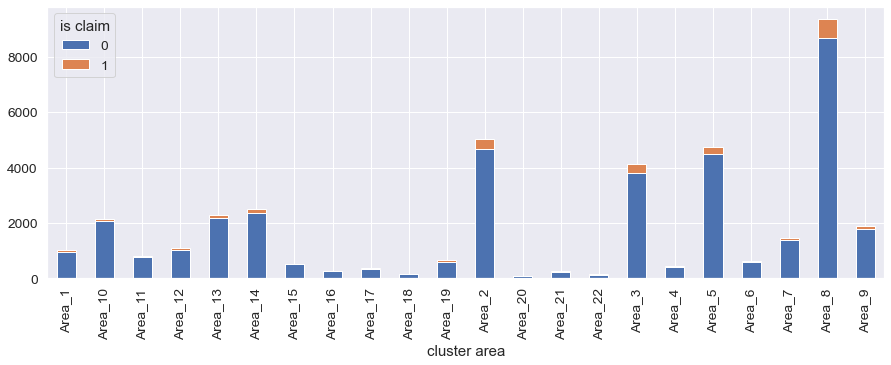

In [47]:
pop_control = pd.crosstab(index=df['cluster area'],columns=df['is claim'])
pop_control.plot(kind='bar', stacked=True, figsize=(15,5));

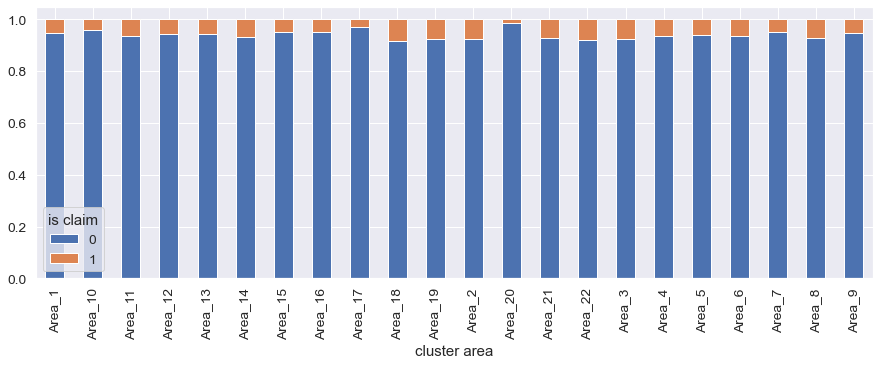

In [51]:
(df.groupby('cluster area')['is claim'].value_counts(normalize=True).unstack('is claim').plot.bar(stacked=True,figsize=(15,5)));

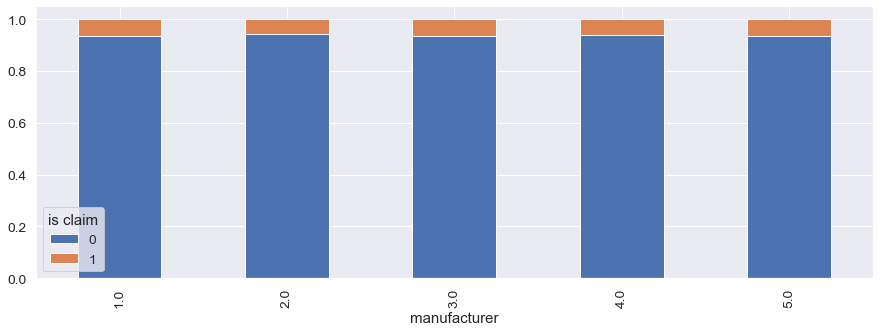

In [52]:
(df.groupby('manufacturer')['is claim'].value_counts(normalize=True).unstack('is claim').plot.bar(stacked=True,figsize=(15,5)));

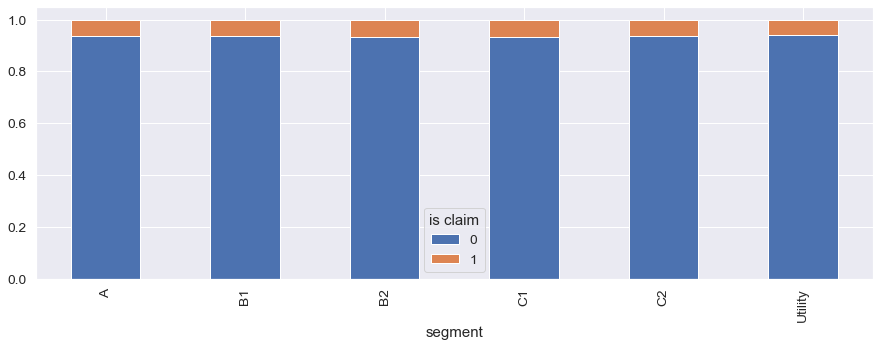

In [53]:
(df.groupby('segment')['is claim'].value_counts(normalize=True).unstack('is claim').plot.bar(stacked=True,figsize=(15,5)));

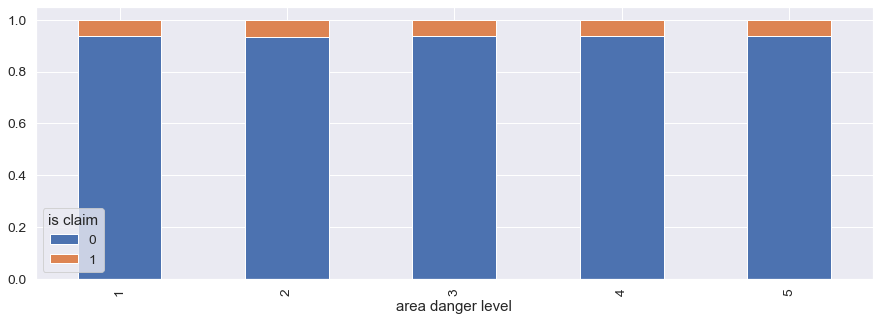

In [54]:
(df.groupby('area danger level')['is claim'].value_counts(normalize=True).unstack('is claim').plot.bar(stacked=True,figsize=(15,5)));

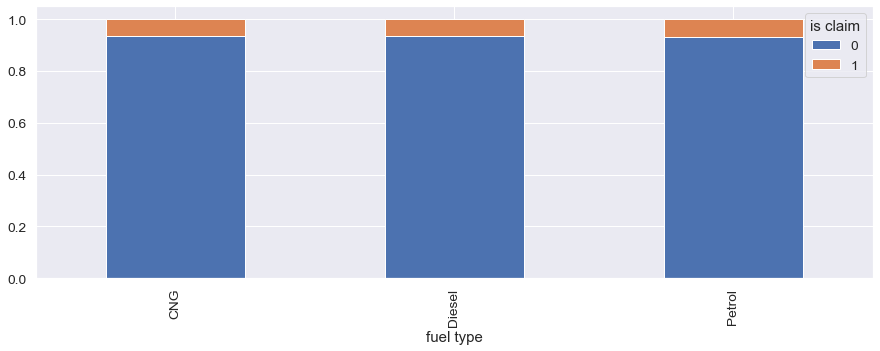

In [55]:
(df.groupby('fuel type')['is claim'].value_counts(normalize=True).unstack('is claim').plot.bar(stacked=True,figsize=(15,5)));

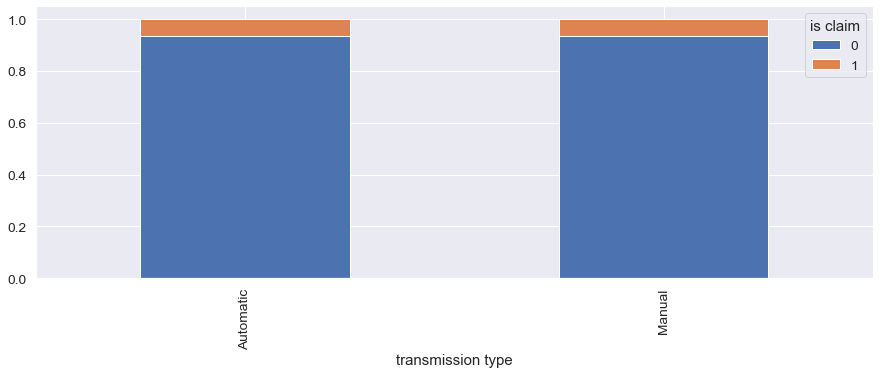

In [56]:
(df.groupby('transmission type')['is claim'].value_counts(normalize=True).unstack('is claim').plot.bar(stacked=True,figsize=(15,5)));

<Figure size 576x360 with 0 Axes>

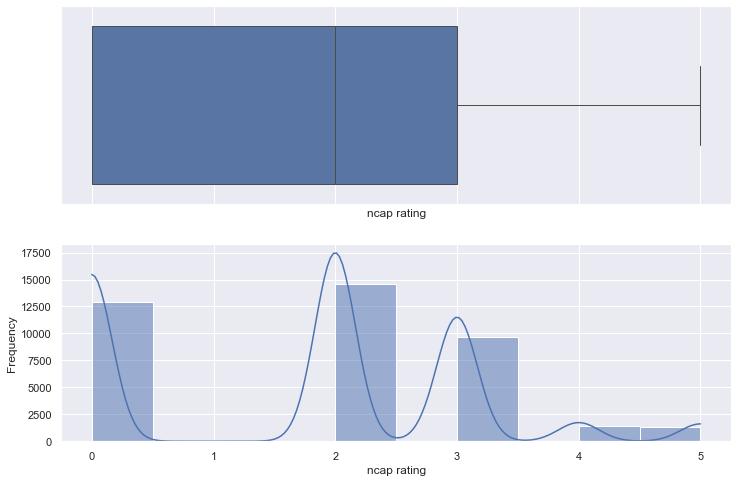

<Figure size 864x576 with 0 Axes>

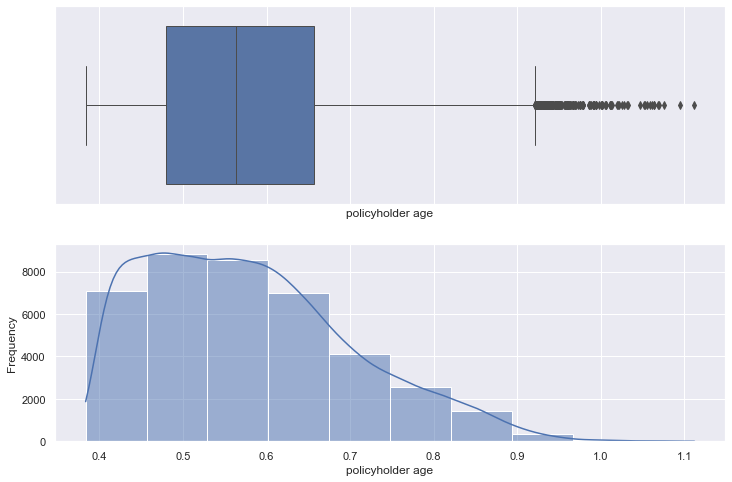

<Figure size 864x576 with 0 Axes>

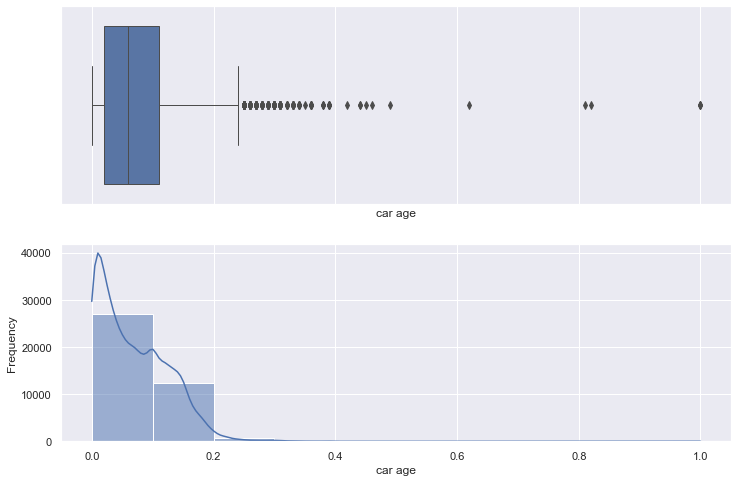

<Figure size 864x576 with 0 Axes>

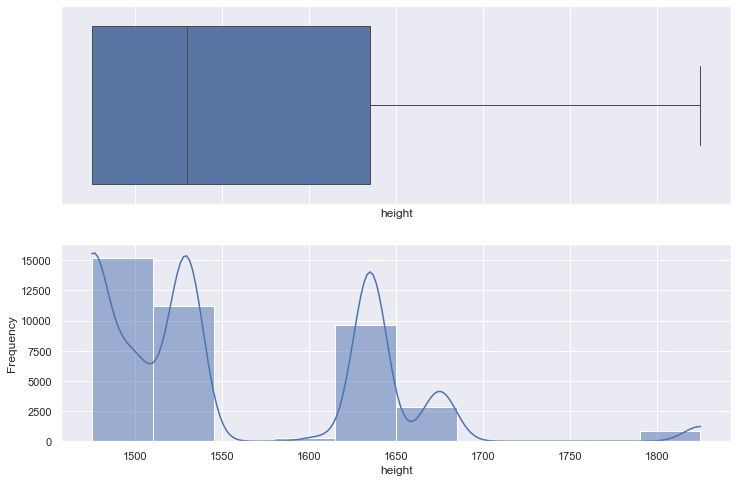

<Figure size 864x576 with 0 Axes>

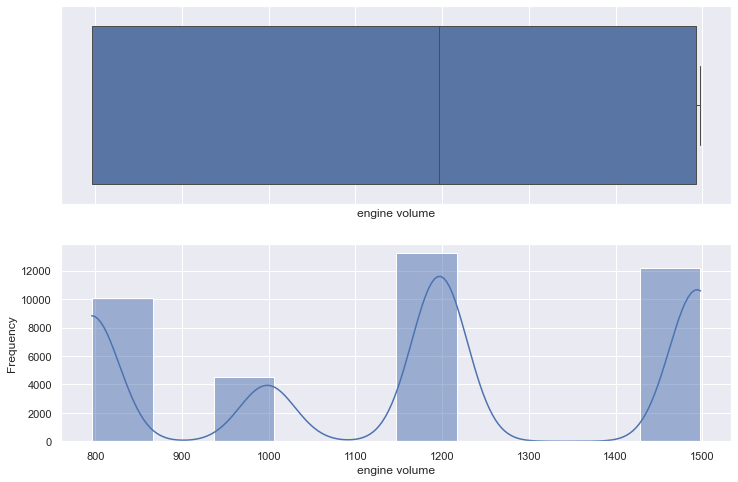

<Figure size 864x576 with 0 Axes>

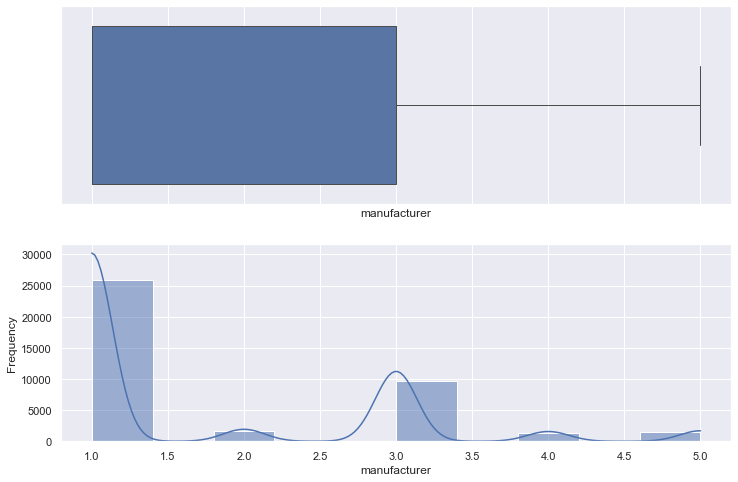

<Figure size 864x576 with 0 Axes>

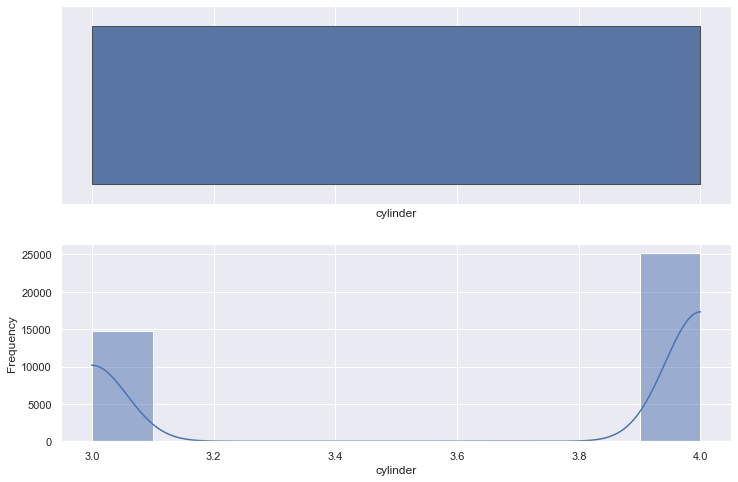

<Figure size 864x576 with 0 Axes>

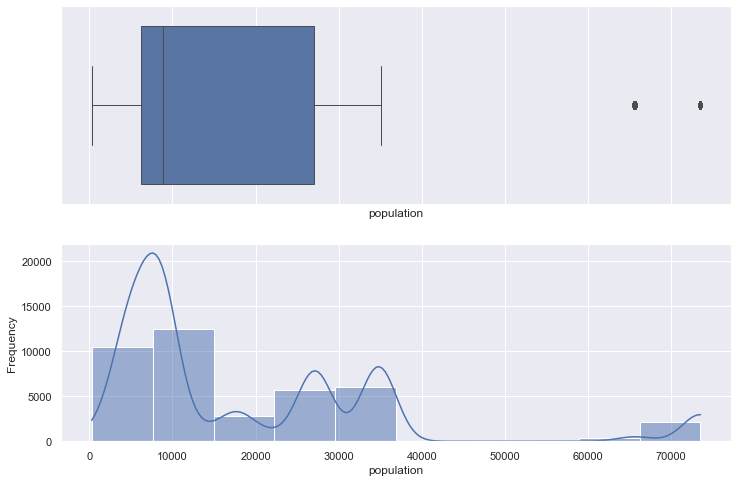

<Figure size 864x576 with 0 Axes>

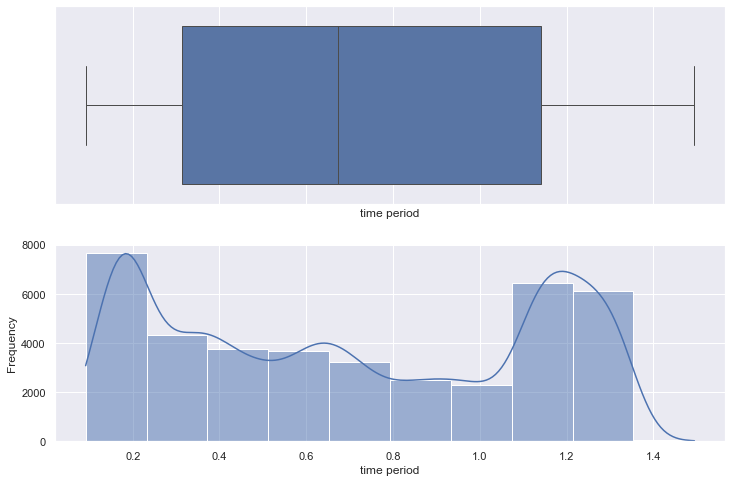

<Figure size 864x576 with 0 Axes>

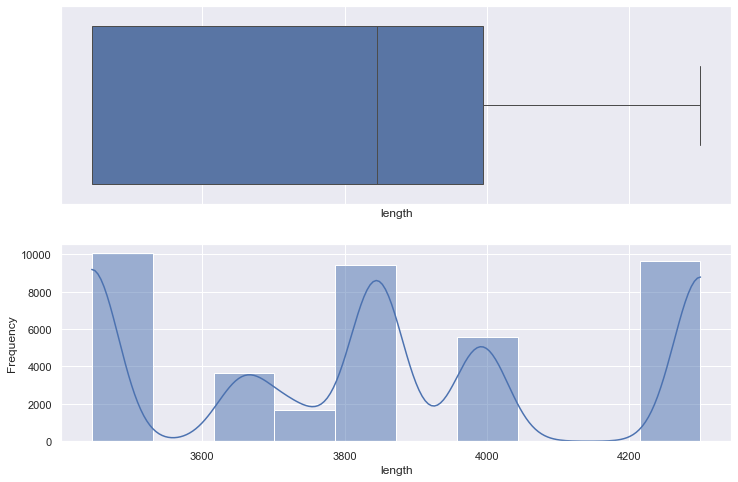

<Figure size 864x576 with 0 Axes>

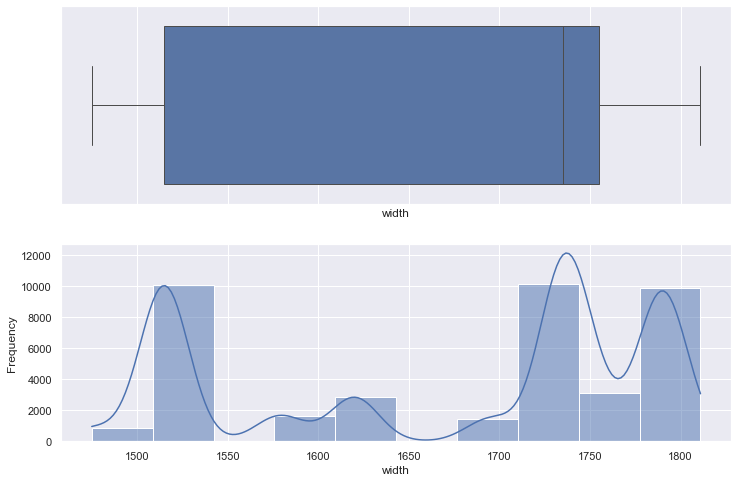

<Figure size 864x576 with 0 Axes>

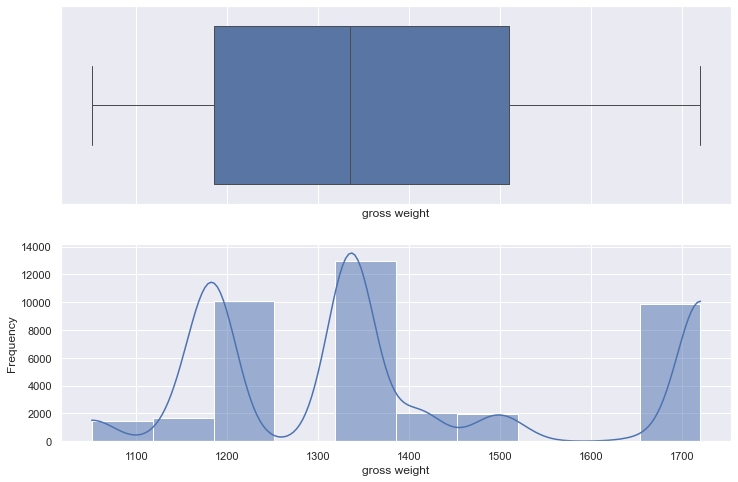

<Figure size 864x576 with 0 Axes>

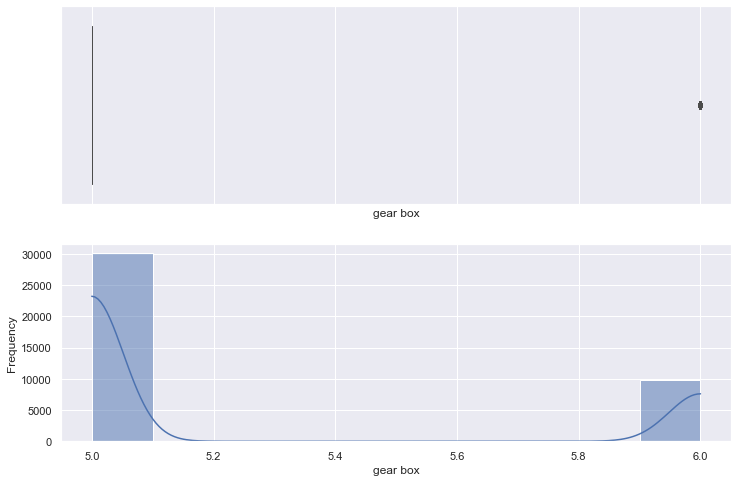

<Figure size 864x576 with 0 Axes>

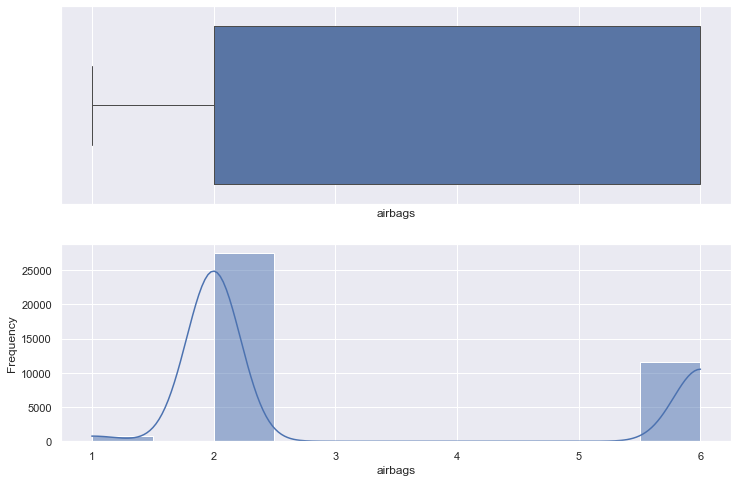

<Figure size 864x576 with 0 Axes>

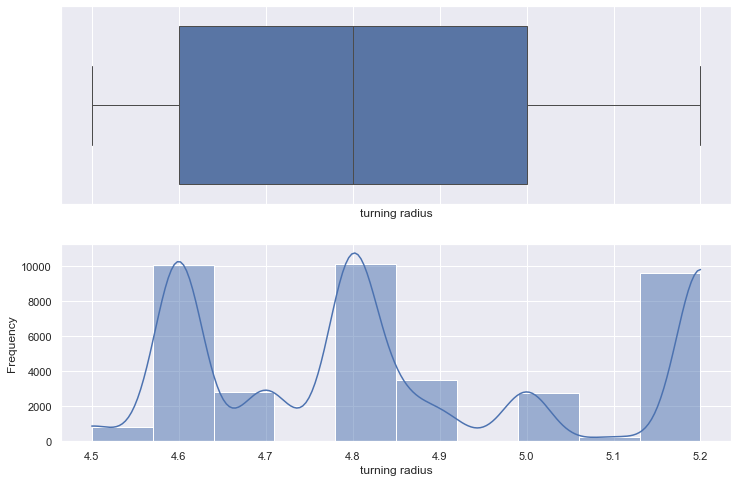

<Figure size 864x576 with 0 Axes>

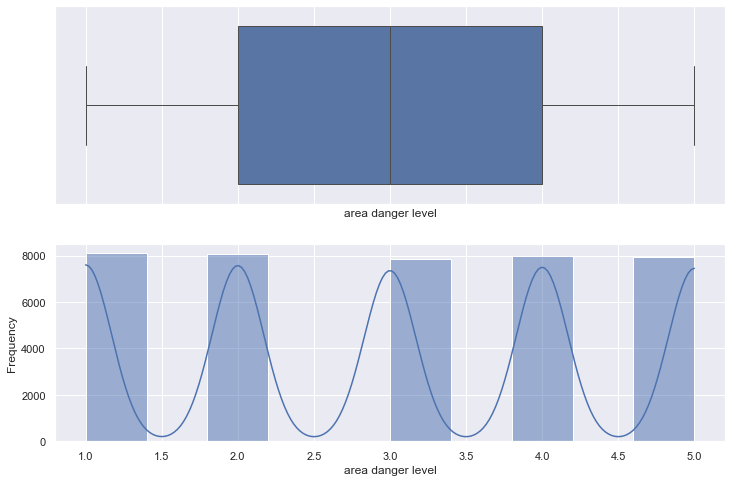

In [80]:
nums = data.select_dtypes(include=["int64","float64"])
nums.drop("is claim",axis=1,inplace=True)
columns = nums.columns.to_list()
for i in columns:
    plt.figure();
    plt.tight_layout();
    sns.set(rc={"figure.figsize":(12, 8)});
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True);
    plt.gca().set(xlabel= i,ylabel='Frequency');
    sns.boxplot(nums[i], ax=ax_box , linewidth= 1.0);
    sns.histplot(nums[i], ax=ax_hist , bins = 10,kde=True);

In [81]:
correlations = df.corr()
correlations = correlations.iloc[:, :] 
cut_off = 0.5
high_corrs = correlations[correlations.abs() > cut_off][correlations.abs() != 1].unstack().dropna().to_dict()
high_corrs = pd.Series(high_corrs, index = high_corrs.keys())
high_corrs = high_corrs.reset_index()
high_corrs = pd.DataFrame(high_corrs)
high_corrs.columns = ['Attributes1', 'Attributes2', 'Correlations']
high_corrs['Correlations'] = high_corrs['Correlations'].drop_duplicates(keep = 'first')
high_corrs.dropna().sort_values(by = 'Correlations', ascending = False)

,Attributes1,Attributes2,Correlations
16,engine volume,length,0.961235
44,length,turning radius,0.944318
40,length,width,0.915308
17,engine volume,width,0.898339
60,gross weight,gear box,0.894386
21,engine volume,turning radius,0.874141
15,engine volume,cylinder,0.865571
32,cylinder,width,0.861667
41,length,gross weight,0.861314
71,gear box,turning radius,0.861243


In [82]:
corr = df.corr()['is claim']
corr[np.argsort(corr, axis=0)[::-1]] 

is claim             1.000000
time period          0.079227
policyholder age     0.026012
cylinder             0.007182
width                0.005194
engine volume        0.002177
length               0.001582
ncap rating          0.000495
area danger level   -0.000391
gross weight        -0.001392
airbags             -0.001392
turning radius      -0.001477
height              -0.002928
gear box            -0.004193
manufacturer        -0.004305
population          -0.020979
car age             -0.027564
Name: is claim, dtype: float64

In [84]:
x1 = df[df["is power door locks"]=='Yes']['is claim']
x2 = df[df["is power door locks"]=='No']['is claim']

tstat, pval = stats.ttest_ind(x1, x2, equal_var=False)
print(pval)

0.30948965093333275


In [85]:
var1 = np.var(x1, ddof=1) ; var2 = np.var(x2, ddof=1)
sig_pooled = np.sqrt(((len(x1)-1)*var1 + (len(x2)-1)*var2)/(len(x1)-1 + len(x2)-1))
print('Effect size:', np.abs(x1.mean()-x2.mean())/sig_pooled)

Effect size: 0.011306017987563095


In [87]:
anovas = []
nums = df.select_dtypes(include=["int64","float64"])
nums_list = nums.columns.to_list()

for (columnName, columnData) in df.iteritems():
    if len(columnData.unique()) > 3 and columnName not in nums_list:
        anovas.append(columnName)

In [89]:
anovas = df[anovas]
anovas

,segment,cluster area,torque,engine type,power,model
0,B1,Area_8,82.1Nm@3400rpm,K10C,55.92bhp@5300rpm,Model_8
1,B1,Area_5,82.1Nm@3400rpm,K10C,55.92bhp@5300rpm,Model_8
2,B2,Area_2,113Nm@4400rpm,K Series Dual jet,88.50bhp@6000rpm,Model_6
3,A,Area_13,60Nm@3500rpm,F8D Petrol Engine,40.36bhp@6000rpm,Model_1
4,C2,Area_9,250Nm@2750rpm,1.5 L U2 CRDi,113.45bhp@4000rpm,Model_4
...,...,...,...,...,...,...
43587,B2,Area_8,113Nm@4400rpm,K Series Dual jet,88.50bhp@6000rpm,Model_6
43588,C1,Area_13,113Nm@4400rpm,1.2 L K12N Dualjet,88.50bhp@6000rpm,Model_2
43589,B2,Area_2,113Nm@4400rpm,K Series Dual jet,88.50bhp@6000rpm,Model_6
43590,B2,Area_8,113Nm@4400rpm,K Series Dual jet,88.50bhp@6000rpm,Model_6


In [90]:
def colfont(value):
    if value > 0.05: color = 'red'
    else: color = 'green'
    return 'color: %s' % color

# convert `y` to a numpy array for more convenient indexing
y = np.array(df['is claim'])

d = []
for key,col in enumerate(anovas):
    # find unique group labels and their corresponding indices
    label, idx = np.unique(anovas[col], return_inverse=True)
    # make a list of arrays containing the y-values corresponding to each unique label
    groups = [y[idx == i] for i,j in enumerate(label)]
    # use `*` to unpack the list as a sequence of arguments to `stats.kruskal`
    H, pKW = stats.kruskal(*groups)  # Kruskal-Wallis test
    F, pAN = stats.f_oneway(*groups) # One-way ANOVA
    #print('%15s %s %.5f' % (col,':',p))
    d.append(
        {
            'feature'  : col,
            'p (KW)'   : pKW,
            'p (ANOVA)': pAN
        }
    )

dfcor = pd.DataFrame(d).sort_values(by=['p (KW)'], ascending=False)
dfcor.style.applymap(colfont, subset=['p (KW)', 'p (ANOVA)'])

,feature,p (KW),p (ANOVA)
3,engine type,0.564819,0.564854
5,model,0.564819,0.564854
0,segment,0.518238,0.518259
4,power,0.458039,0.458061
2,torque,0.458039,0.458061
1,cluster area,0.000000,0.000000


In [95]:
anovas["target"] = df["is claim"]
anovas.columns = ["segment","clusterarea","torque","engine","power","model","target"]
def colfont(value):
    if value == 'SMALL': color = 'grey'
    elif value == 'MEDIUM': color = 'green'
    else: color = 'red'
    return 'color: %s' % color

d = []
for tar in ["target"]:
    for feat in anovas:
        my_formula = tar + '~' + 'C(' + feat + ')'
        mod = ols(formula=my_formula, data=anovas).fit()
        aov_table = sm.stats.anova_lm(mod, typ=2)
        ss_btw = aov_table['sum_sq'][0]
        ss_err = aov_table['sum_sq'][1]
        etasq = ss_btw/(ss_btw + ss_err)
        if etasq < 0.06 : effect = 'SMALL'
        if etasq < 0.16 and etasq >= 0.06: effect = 'MEDIUM' 
        if etasq >= 0.16: effect = 'LARGE'
        d.append(
            {
                'target' : tar,
                'feature': feat,
                'eta-sq' : etasq,
            'effect size': effect
            }
        )
dfcor = pd.DataFrame(d).sort_values(by=['eta-sq'], ascending=False)
dfcor.style.applymap(colfont, subset=['effect size'])

,target,feature,eta-sq,effect size
6,target,target,1.000000,LARGE
1,target,clusterarea,0.001881,SMALL
5,target,model,0.000217,SMALL
3,target,engine,0.000217,SMALL
2,target,torque,0.000194,SMALL
4,target,power,0.000194,SMALL
0,target,segment,0.000106,SMALL
